**2017.12.02 - work log - prelim - R network analysis - statnet**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#R-network-analysis-files" data-toc-modified-id="R-network-analysis-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>R network analysis files</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Setup----set-working-directory" data-toc-modified-id="Setup----set-working-directory-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setup -  set working directory</a></span></li><li><span><a href="#Setup---import-SNA-functions" data-toc-modified-id="Setup---import-SNA-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup - import SNA functions</a></span></li><li><span><a href="#Setup---network-data---render-and-store-network-data" data-toc-modified-id="Setup---network-data---render-and-store-network-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Setup - network data - render and store network data</a></span><ul class="toc-item"><li><span><a href="#data---grp_month" data-toc-modified-id="data---grp_month-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>data - grp_month</a></span></li><li><span><a href="#data---prelim_network---new" data-toc-modified-id="data---prelim_network---new-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>data - prelim_network - new</a></span></li><li><span><a href="#data---prelim_network---old" data-toc-modified-id="data---prelim_network---old-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>data - prelim_network - old</a></span></li></ul></li></ul></li><li><span><a href="#grp_month-analysis" data-toc-modified-id="grp_month-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>grp_month</code> analysis</a></span><ul class="toc-item"><li><span><a href="#grp_month-(gm)---automated---OpenCalais" data-toc-modified-id="grp_month-(gm)---automated---OpenCalais-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - OpenCalais</a></span><ul class="toc-item"><li><span><a href="#grp_month-(gm)---automated---Read-data" data-toc-modified-id="grp_month-(gm)---automated---Read-data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - Read data</a></span></li><li><span><a href="#grp_month-(gm)---automated---initialize-statnet" data-toc-modified-id="grp_month-(gm)---automated---initialize-statnet-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - initialize statnet</a></span></li><li><span><a href="#grp_month-(gm)---automated---Basic-metrics" data-toc-modified-id="grp_month-(gm)---automated---Basic-metrics-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - Basic metrics</a></span></li><li><span><a href="#grp_month-(gm)---automated---More-metrics" data-toc-modified-id="grp_month-(gm)---automated---More-metrics-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - More metrics</a></span></li><li><span><a href="#grp_month-(gm)---automated---create-node-attribute-DataFrame" data-toc-modified-id="grp_month-(gm)---automated---create-node-attribute-DataFrame-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - create node attribute DataFrame</a></span></li></ul></li><li><span><a href="#grp_month-(gm)---human" data-toc-modified-id="grp_month-(gm)---human-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human</a></span><ul class="toc-item"><li><span><a href="#grp_month-(gm)---human---Read-data" data-toc-modified-id="grp_month-(gm)---human---Read-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human - Read data</a></span></li><li><span><a href="#grp_month-(gm)---human---initialize-statnet" data-toc-modified-id="grp_month-(gm)---human---initialize-statnet-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human - initialize statnet</a></span></li><li><span><a href="#grp_month-(gm)---human---Basic-metrics" data-toc-modified-id="grp_month-(gm)---human---Basic-metrics-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human - Basic metrics</a></span></li><li><span><a href="#grp_month-(gm)---human---More-metrics" data-toc-modified-id="grp_month-(gm)---human---More-metrics-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human - More metrics</a></span></li><li><span><a href="#grp_month-(gm)---human---create-node-attribute-DataFrame" data-toc-modified-id="grp_month-(gm)---human---create-node-attribute-DataFrame-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human - create node attribute DataFrame</a></span></li></ul></li><li><span><a href="#grp_month-QAP-graph-correlation-between-automated-and-ground-truth" data-toc-modified-id="grp_month-QAP-graph-correlation-between-automated-and-ground-truth-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>grp_month</code> QAP graph correlation between automated and ground truth</a></span></li></ul></li><li><span><a href="#TODO" data-toc-modified-id="TODO-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TODO</a></span></li></ul></div>

# R network analysis files

- Back to [Table of Contents](#Table-of-Contents)

Related files:

* network descriptives
    * network-level
        
        * files
            
            * R scripts:
                
                * `sourcenet/R/db_connect.r`
                * `sourcenet/R/sna/functions-sna.r`
                * `sourcenet/R/sna/sna-load_data.r`
                * `sourcenet/R/sna/igraph/*`
                * `sourcenet/R/sna/statnet/*`
        
        * statnet/sna
            
            * `sna::gden()` - graph density
            * R scripts:
                
                * `sourcenet/R/sna/statnet/sna-statnet-init.r`
                * `sourcenet/R/sna/statnet/sna-statnet-network-stats.r`
                * `sourcenet/R/sna/statnet/sna-qap.r`
        
        * igraph
            
            * `igraph::transitivity()` - vector of transitivity scores for each node in a graph, plus network-level transitivity score.
                
                * Q - interpretation?
                
            * R scripts:
                
                * `sourcenet/R/sna/statnet/sna-igraph-init.r`
                * `sourcenet/R/sna/statnet/sna-igraph-network-stats.r`


# Setup

- Back to [Table of Contents](#Table-of-Contents)

## Setup -  set working directory

- Back to [Table of Contents](#Table-of-Contents)

Once files are in place, change your working directory in R to this same folder:

In [1]:
getwd()

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work"

In [2]:
setwd( '/home/jonathanmorgan/work/sourcenet/django/research/sourcenet/R/sna' )

In [3]:
getwd()

[1] "/home/jonathanmorgan/work/sourcenet/django/research/sourcenet/R/sna"

## Setup - import SNA functions

- Back to [Table of Contents](#Table-of-Contents)

source the file `functions-sna.r`.

In [4]:
source( 'functions-sna.r' )

## Setup - network data - render and store network data

- Back to [Table of Contents](#Table-of-Contents)

First, need render to render network data and upload it to your server.

Directions for rendering network data are in [2017.11.14-work_log-prelim-network_analysis.ipynb](2017.11.14-work_log-prelim-network_analysis.ipynb).  You want a tab-delimited matrix that includes both the network and attributes of nodes as columns, and you want it to include a header row.

Once you render your network data files, you should place them on the server.

High level data file layout:

- tab-delimited.
- first row and first column are labels
- last 2 columns are traits of nodes (`person_id` and `person_type`)
- each row and column after first until the trait columns represents a person found in one of the articles.
- The people are in the same order from top to bottom and left to right.
- Where the row and column of two people meet, and one of the people is an author, the nunber in the cell where they meet is the number of times the non-author was quoted in an article by the author.  Does not include more basic two-mode co-location ties (appeared in same article, even if not an author and/or not quoted).

Files and their location on server:

### data - grp_month

- Back to [Table of Contents](#Table-of-Contents)

This is data from the Grand Rapids Press articles from December of 2009, coded by both humans and OpenCalais.

Files:

- automated full month - `sourcenet_data-20171205-022551-grp_month-automated.tab`
- automated week subset - `sourcenet_data-20171115-043246-grp_month-automated-week_subset.tab`
- human full month - `sourcenet_data-20171115-043102-grp_month-human.tab`
- human week subset - `sourcenet_data-20171115-043404-grp_month-human-week_subset.tab`

Location in Dropbox: `Dropbox/academia/MSU/program_stuff/prelim_paper/data/network_analysis/2017.11.14/network/new_coders/grp_month`

Location on server: `/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month`

### data - prelim_network - new

- Back to [Table of Contents](#Table-of-Contents)

This is data from the Grand Rapids Press articles from December 6 through 12, 2009, coded by new human coders in 2015, and OpenCalais.

Files:

- automated - `sourcenet_data-20171115-033413-new-prelim_network-week-automated.tab`
- automated using ordered fields - `sourcenet_data-20171115-041030-new-prelim_network-week-automated-all_ordered-person-2.13.8.9.10.tab`
- human - new coders - unordered - `sourcenet_data-20171115-035924-new-prelim_network-week-human-unordered.tab`
- human - new coders - ordered 13,8,9,10 - `sourcenet_data-20171114-183930-new-prelim_network-week-human-new-ordered-13.8.9.10.tab`

Location in Dropbox: `Dropbox/academia/MSU/program_stuff/prelim_paper/data/network_analysis/2017.11.14/network/new_coders/prelim_network`

Location on server: `/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/prelim_network/2017`

Notes:

- There are differences, but they are about what I'd expect for ground_truth taking precedence consistently - 35 rows different.
- automated I tried two ways - using select, and using ordered list.  Identical either way.

### data - prelim_network - old

- Back to [Table of Contents](#Table-of-Contents)

This is data from the Grand Rapids Press articles from December 6 through 12, 2009, coded by original human coders in 2009, and OpenCalais.

Files:

- human - original coders - article and person unordered - `sourcenet_data-20171114-182817-prelim_network-week-human-original-unordered.tab`
- human - original coders - article ordered (6,4), person unordered - `sourcenet_data-20171114-183930-prelim_network-week-human-original-ordered-64.tab`
- human - original coders - article (6,4) and person (2,6,4) ordered - `sourcenet_data-20171115-024247-prelim_network-week-human-original-ordered-64-264.tab`
- automated - `sourcenet_data-20171114-182942-prelim_network-week-automated.tab`

Location in Dropbox: `Dropbox/academia/MSU/program_stuff/prelim_paper/data/network_analysis/2017.11.14/network/original_coders/prelim_network`

Location on server: `/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/prelim_network/2009`

Notes:

- The human ones are almost identical - compared in kaleidoscope - 3 lines different.  The automated one is quite different - evidence that network correlations are not really so useful with so many 0s.
- Ordered or unordered in person, configured as it was for this, files are identical (YAY! as it should be!).

# `grp_month` analysis

- Back to [Table of Contents](#Table-of-Contents)

First, look at the shiny new month of data.

## `grp_month` (gm) - automated - OpenCalais

- Return to [Table of Contents](#Table-of-Contents)

First, we'll analyze the month of data coded by OpenCalais.  Set up some variables to store where data is located:

### `grp_month` (gm) - automated - Read data

- Return to [Table of Contents](#Table-of-Contents)

Read in the data from tab-delimited data file, then get it in right data structures for use in R SNA.

In [5]:
# initialize variables
gmAutomatedDataFolder <- "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month"
gmAutomatedDataFile <- "sourcenet_data-20171205-022551-grp_month-automated.tab"
gmAutomatedDataPath <- paste( gmAutomatedDataFolder, "/", gmAutomatedDataFile, sep = "" )

In [6]:
gmAutomatedDataPath

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month/sourcenet_data-20171205-022551-grp_month-automated.tab"

Load the data file into memory

In [9]:
# tab-delimited:
gmAutomatedDataDF <- read.delim( gmAutomatedDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [10]:
# get count of rows...
gmAutomatedRowCount <- nrow( gmAutomatedDataDF )
paste( "grp_month automated row count = ", gmAutomatedRowCount, sep = "" )

# ...and columns
gmAutomatedColumnCount <- ncol( gmAutomatedDataDF )
paste( "grp_month automated column count = ", gmAutomatedColumnCount, sep = "" )

[1] "grp_month automated row count = 1167"

[1] "grp_month automated column count = 1169"

Get just the tie rows and columns for initializing network libraries.

In [11]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
gmAutomatedNetworkDF <- gmAutomatedDataDF[ , 1 : gmAutomatedRowCount ]
#str( gmAutomatedNetworkDF )

In [12]:
# convert to a matrix
gmAutomatedNetworkMatrix <- as.matrix( gmAutomatedNetworkDF )
# str( gmAutomatedNetworkMatrix )

### `grp_month` (gm) - automated - initialize statnet

- Back to [Table of Contents](#Table-of-Contents)

First, load the statnet package, then load the automated grp_month data into statnet object and assign attributes to nodes.

Based on `sourcenet/R/sna/statnet/sna-statnet-init.r`.

In [13]:
# make sure you've loaded the statnet library
# install.packages( "statnet" )
library( statnet )

Loading required package: tergm
Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: ergm
Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


ergm: version 3.8.0, created on 2017-08-18
Copyright (c) 2017, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine


In [15]:
# If you have a data frame of attributes (each attribute is a column, with
#     attribute name the column name), you can associate those attributes
#     when you create the network.
# attribute help: http://www.inside-r.org/packages/cran/network/docs/loading.attributes

# load attributes from a file:
#tab_attribute_test1 <- read.delim( "tab-test1-attribute_data.txt", header = TRUE, row.names = 1, check.names = FALSE )

# or create DataFrame by just grabbing the attribute columns
gmAutomatedNetworkAttributeDF <- gmAutomatedDataDF[ , 1168:1169 ]

# convert matrix to statnet network object instance.
gmAutomatedNetworkStatnet <- network( gmAutomatedNetworkMatrix, matrix.type = "adjacency", directed = FALSE, vertex.attr = gmAutomatedNetworkAttributeDF )

# look at information now.
gmAutomatedNetworkStatnet

# Network attributes:
#  vertices = 314
#  directed = FALSE
#  hyper = FALSE
#  loops = FALSE
#  multiple = FALSE
#  bipartite = FALSE
#  total edges= 309
#    missing edges= 0
#    non-missing edges= 309
#
# Vertex attribute names:
#    person_type vertex.names
#
# No edge attributes


 Network attributes:
  vertices = 1167 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 1152 
    missing edges= 0 
    non-missing edges= 1152 

 Vertex attribute names: 
    person_id person_type vertex.names 

 Edge attribute names not shown 

### `grp_month` (gm) - automated - Basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [16]:
# assuming that our statnet network object is in reference test1_statnet.

# Use the degree function in the sna package to create vector of degree values
#    for each node.  Make sure to pass the gmode parameter to tell it that the
#    graph is not directed (gmode = "graph", instead of "digraph").
# Doc: http://www.inside-r.org/packages/cran/sna/docs/degree
#degree_vector <- degree( test1_statnet, gmode = "graph" )

# If you have other libraries loaded that also implement a degree function, you
#    can also call this with package name:
gmAutomatedDegreeVector <- sna::degree( gmAutomatedNetworkStatnet, gmode = "graph" )

# output the vector
gmAutomatedDegreeVector

# want more info on the degree function?  You can get to it eventually through
#    the following:
#help( package = "sna" )
#??sna::degree

# what is the average (mean) degree?
gmAutomatedAvgDegree <- mean( gmAutomatedDegreeVector )
paste( "average degree = ", gmAutomatedAvgDegree, sep = "" )

# subset vector to get only those that are above mean
gmAutomatedAboveMeanVector <- gmAutomatedDegreeVector[ gmAutomatedDegreeVector > gmAutomatedAvgDegree ]

# Take the degree and associate it with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
gmAutomatedNetworkStatnet %v% "degree" <- gmAutomatedDegreeVector

# also add degree vector to original data frame
gmAutomatedDataDF$degree <- gmAutomatedDegreeVector


[1] 30  1 39  1 34  1  1 50 26  1 29  1 47  1  1 93 46 29 47 71  2  9  1  1
  [25]  2  1 35  0  2  2  2  2  1  1  1  1  1 42  1  0  1  2  2  1  5  1  0  1
  [49] 43  5  1 14  1  1  2  2  1  2  1  1  1  1  1  1  0  1  0  2  4  1  1 32
  [73]  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1
  [97]  9  2  1  1  1  1  1  2  5  0  0  0  0  1  1  1  0  1  1  2  0  2  2  1
 [121]  1  1  1  1  2  1  1  1  1  1  0  1  1 35  1  1  1  1  1  1  0  1  1 19
 [145]  1  1  1  1  1  1 27  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
 [169]  1  1  1  1  4  1  1 32 49  1  2  0  1  1 44  1  1  1  1  1  1  1  2  1
 [193]  1  2  1  1  4  0  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  0  2  2
 [217]  1  1  1  1  1  4  1  1  1  0  1  1  1  1  2  1 15  1  0  1  1  2  2  2
 [241]  2  2  2  4  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
 [265]  1  1  1  1  1  1  1  1  1  1  0  0  2  2  2  2  1  1  2  1  1  1  1  1
 [289]  1  1  2  1  0  2  0  1  2  3  1  1  1  1  0  1  1  1  0  1 72 22 46  3
 [313]  1  1  1 10  8  2  1  1  2  1  1  2  1  2  2  1  1  1  1  0  0  0  1  2
 [337]  1  1  1  1  1  1  2  1  0  1  1  1  1  1  1  0  1  1  0  1  1  0  0  1
 [361]  1  0  0  1  1  1  3  2 15  1  1  1  1  0  2  1  0  1  1  1  1  1  1  1
 [385]  1  2  1  2  1  1  1  0  1  0  0  1  1  1  1  1  1  2  1  0  1  7  1  1
 [409]  1  1  1  1  1  0  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [433]  1  1  1  0  1  1  1  1  1  3  2  4  2  1  2  2  1  1  1  1  1  0  1  1
 [457]  0  1  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  1  1  2  1  4  1  1
 [481]  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1
 [505]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [529]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [553]  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1  1  1  1  1  1  1  1  1  1
 [577]  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  0  2  1  0  1  1  1  0
 [601]  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  0  1  5  1  1  1  1  1
 [625]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  2  2
 [649]  0  2  2  0  1  1  1  0  0  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1
 [673]  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1
 [697]  0  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1
 [721]  1  1  0  0  0  1  1  1  1  1  1  1  0  0  1  0  0  1  0  0  1  1  1  1
 [745]  1  1  1  1  1  1  1  1  1  1  0  1  1  2  1  0  1  0  1  1  1  0  1  1
 [769]  1  1  1  0  2  2  2  2  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
 [793]  1  0  2  1  1  1  1  1  1  1  2  1  1  1  0  1  1  1  1  1  0  1  1  1
 [817]  1  0  1  1  1  1  0  1  0  0  1  1  0  1  3  2  1  1  1  2  1  0  1  1
 [841]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  0  1  1  1  1
 [865]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [889]  1  1  1  1  1  0  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
 [913]  1  1  1  1  1  1  1  0  1  1  1  1  1  0  0  1  1  1  1  1  1  1  0  1
 [937]  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [961]  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  1  0
 [985]  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  0
[1009]  1  1  1  0  1  1  0  1  1  1  1  0  1  1  0  1  1  1  1  1  1  1  1  0
[1033]  1  1  6  1  1  1  1  2  1  1  1  1  1  2  2  0  2  2  1  1  1  1  1  1
[1057]  1  0  1  1  1  1  1  1  1  1  2  0  2  2  2  1  0  1  1  1  1  1  0  1
[1081]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[1105]  1  1  1  1  1  1  0  1  2  2  2  2  2  2  2  1  1  1  0  0  1  1  1  1
[1129]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  1
[1153]  1  1  1  1  1  1  2  2  1  1  2  0  1  0  1

[1] "average degree = 1.97429305912596"

In [17]:
# average author degree (person types 2 and 4)
gmAutomatedAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", gmAutomatedAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
gmAutomatedAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", gmAutomatedAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
gmAutomatedAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", gmAutomatedAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
gmAutomatedAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", gmAutomatedAverageSourceDegreeOnly3, sep = "" )


[1] "average author degree (2 and 4) = 24.7872340425532"

[1] "average author degree (only 2) = 24.8478260869565"

[1] "average source degree (3 and 4) = 1.161"

[1] "average source degree (only 3) = 1.14014014014014"

### `grp_month` (gm) - automated - More metrics

- Back to [Table of Contents](#Table-of-Contents)

Now that we have the data in statnet object, run the code in the following for more in-depth information:

* `sourcenet/R/sna/statnet/sna-statnet-network-stats.r`

In [18]:
# Links:
# - manual (PDF): http://cran.r-project.org/web/packages/sna/sna.pdf
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# statnet
#==============================================================================#

# make sure you've loaded the statnet library (includes sna)
# install.packages( "statnet" )
#library( statnet )

#==============================================================================#
# NODE level
#==============================================================================#

# what is the standard deviation of the degrees?
gmAutomatedDegreeSd <- sd( gmAutomatedDegreeVector )
paste( "degree SD = ", gmAutomatedDegreeSd, sep = "" )

# what is the variance of the degrees?
gmAutomatedDegreeVar <- var( gmAutomatedDegreeVector )
paste( "degree variance = ", gmAutomatedDegreeVar, sep = "" )

# what is the max value among the degrees?
gmAutomatedDegreeMax <- max( gmAutomatedDegreeVector )
paste( "degree max = ", gmAutomatedDegreeMax, sep = "" )

# calculate and plot degree distributions
gmAutomatedDegreeFrequenciesTable <- table( gmAutomatedDegreeVector )
paste( "degree frequencies = ", gmAutomatedDegreeFrequenciesTable, sep = "" )
gmAutomatedDegreeFrequenciesTable

# node-level undirected betweenness
gmAutomatedBetweenness <- sna::betweenness( gmAutomatedNetworkStatnet, gmode = "graph", cmode = "undirected" )

#paste( "betweenness = ", gmAutomatedBetweenness, sep = "" )
# associate with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
gmAutomatedNetworkStatnet %v% "betweenness" <- gmAutomatedBetweenness

# also add degree vector to original data frame
gmAutomatedDataDF$betweenness <- gmAutomatedBetweenness

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
gmAutomatedDegreeCentrality <- sna::centralization( gmAutomatedNetworkStatnet, sna::degree, mode = "graph" )
paste( "degree centrality = ", gmAutomatedDegreeCentrality, sep = "" )

# graph-level betweenness centrality
gmAutomatedBetweennessCentrality <- sna::centralization( gmAutomatedNetworkStatnet, sna::betweenness, mode = "graph", cmode = "undirected" )
paste( "betweenness centrality = ", gmAutomatedBetweennessCentrality, sep = "" )

# graph-level connectedness
gmAutomatedConnectedness <- sna::connectedness( gmAutomatedNetworkStatnet )
paste( "connectedness = ", gmAutomatedConnectedness, sep = "" )

# graph-level transitivity
gmAutomatedTransitivity <- sna::gtrans( gmAutomatedNetworkStatnet, mode = "graph" )
paste( "transitivity = ", gmAutomatedTransitivity, sep = "" )

# graph-level density
gmAutomatedDensity <- sna::gden( gmAutomatedNetworkStatnet, mode = "graph" )
paste( "density = ", gmAutomatedDensity, sep = "" )


[1] "degree SD = 6.42460087405331"

[1] "degree variance = 41.2754963908866"

[1] "degree max = 93"

[1] "degree frequencies = 122" "degree frequencies = 891"
 [3] "degree frequencies = 100" "degree frequencies = 6"  
 [5] "degree frequencies = 9"   "degree frequencies = 4"  
 [7] "degree frequencies = 1"   "degree frequencies = 2"  
 [9] "degree frequencies = 1"   "degree frequencies = 2"  
[11] "degree frequencies = 1"   "degree frequencies = 1"  
[13] "degree frequencies = 2"   "degree frequencies = 1"  
[15] "degree frequencies = 1"   "degree frequencies = 1"  
[17] "degree frequencies = 1"   "degree frequencies = 2"  
[19] "degree frequencies = 1"   "degree frequencies = 2"  
[21] "degree frequencies = 1"   "degree frequencies = 2"  
[23] "degree frequencies = 1"   "degree frequencies = 1"  
[25] "degree frequencies = 1"   "degree frequencies = 1"  
[27] "degree frequencies = 2"   "degree frequencies = 2"  
[29] "degree frequencies = 1"   "degree frequencies = 1"  
[31] "degree frequencies = 1"   "degree frequencies = 1"  
[33] "degree frequencies = 1"

gmAutomatedDegreeVector
  0   1   2   3   4   5   6   7   8   9  10  14  15  19  22  26  27  29  30  32 
122 891 100   6   9   4   1   2   1   2   1   1   2   1   1   1   1   2   1   2 
 34  35  39  42  43  44  46  47  49  50  71  72  93 
  1   2   1   1   1   1   2   2   1   1   1   1   1 

[1] "degree centrality = 0.0782006640213782"

[1] "betweenness centrality = 0.206660606881935"

[1] "connectedness = 0.588270050752468"

Warning message in sna::gtrans(gmAutomatedNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but your data looks too large for that to work well.  Overriding to edgelist method.”

[1] "transitivity = 0.00893353450329548"

[1] "density = 0.00169321874710632"

### `grp_month` (gm) - automated - create node attribute DataFrame

- Back to [Table of Contents](#Table-of-Contents)

If you want to just work with the traits of the nodes/vertexes, you can combine the attribute vectors into a data frame.

In [19]:
#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output network object to see what attributes you have
gmAutomatedNetworkStatnet

# then, combine them into a data frame.
gmAutomatedNodeAttrDF <- data.frame( id = gmAutomatedNetworkStatnet %v% "vertex.names",
                                     person_id = gmAutomatedNetworkStatnet %v% "person_id",
                                     person_type = gmAutomatedNetworkStatnet %v% "person_type",
                                     degree = gmAutomatedNetworkStatnet %v% "degree",
                                     betweenness = gmAutomatedNetworkStatnet %v% "betweenness" )


 Network attributes:
  vertices = 1167 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 1152 
    missing edges= 0 
    non-missing edges= 1152 

 Vertex attribute names: 
    betweenness degree person_id person_type vertex.names 

 Edge attribute names not shown 

## `grp_month` (gm) - human

- Return to [Table of Contents](#Table-of-Contents)

Next, we'll analyze the month of data coded by human coders.  Set up some variables to store where data is located:

### `grp_month` (gm) - human - Read data

- Return to [Table of Contents](#Table-of-Contents)

Read in the data from tab-delimited data file, then get it in right data structures for use in R SNA.

In [20]:
# initialize variables
gmHumanDataFolder <- "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month"
gmHumanDataFile <- "sourcenet_data-20171115-043102-grp_month-human.tab"
gmHumanDataPath <- paste( gmHumanDataFolder, "/", gmHumanDataFile, sep = "" )

In [21]:
gmHumanDataPath

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month/sourcenet_data-20171115-043102-grp_month-human.tab"

Load the data file into memory

In [22]:
# tab-delimited:
gmHumanDataDF <- read.delim( gmHumanDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [23]:
# get count of rows...
gmHumanRowCount <- nrow( gmHumanDataDF )
paste( "grp_month automated row count = ", gmHumanRowCount, sep = "" )

# ...and columns
gmHumanColumnCount <- ncol( gmHumanDataDF )
paste( "grp_month automated column count = ", gmHumanColumnCount, sep = "" )

[1] "grp_month automated row count = 1167"

[1] "grp_month automated column count = 1169"

Get just the tie rows and columns for initializing network libraries.

In [24]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
gmHumanNetworkDF <- gmHumanDataDF[ , 1 : gmHumanRowCount ]
#str( gmHumanNetworkDF )

In [25]:
# convert to a matrix
gmHumanNetworkMatrix <- as.matrix( gmHumanNetworkDF )
# str( gmHumanNetworkMatrix )

### `grp_month` (gm) - human - initialize statnet

- Back to [Table of Contents](#Table-of-Contents)

First, load the statnet package, then load the automated grp_month data into statnet object and assign attributes to nodes.

Based on `sourcenet/R/sna/statnet/sna-statnet-init.r`.

In [26]:
# make sure you've loaded the statnet library
# install.packages( "statnet" )
library( statnet )

In [27]:
# If you have a data frame of attributes (each attribute is a column, with
#     attribute name the column name), you can associate those attributes
#     when you create the network.
# attribute help: http://www.inside-r.org/packages/cran/network/docs/loading.attributes

# load attributes from a file:
#tab_attribute_test1 <- read.delim( "tab-test1-attribute_data.txt", header = TRUE, row.names = 1, check.names = FALSE )

# or create DataFrame by just grabbing the attribute columns
#gmHumanNetworkAttributeDF <- gmHumanDataDF[ , 1169:1170 ]
gmHumanNetworkAttributeDF <- gmHumanDataDF[ , 1168:1169 ]

# convert matrix to statnet network object instance.
gmHumanNetworkStatnet <- network( gmHumanNetworkMatrix, matrix.type = "adjacency", directed = FALSE, vertex.attr = gmHumanNetworkAttributeDF )

# look at information now.
gmHumanNetworkStatnet

# Network attributes:
#  vertices = 314
#  directed = FALSE
#  hyper = FALSE
#  loops = FALSE
#  multiple = FALSE
#  bipartite = FALSE
#  total edges= 309
#    missing edges= 0
#    non-missing edges= 309
#
# Vertex attribute names:
#    person_type vertex.names
#
# No edge attributes


 Network attributes:
  vertices = 1167 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 1201 
    missing edges= 0 
    non-missing edges= 1201 

 Vertex attribute names: 
    person_id person_type vertex.names 

 Edge attribute names not shown 

### `grp_month` (gm) - human - Basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [28]:
# assuming that our statnet network object is in reference test1_statnet.

# Use the degree function in the sna package to create vector of degree values
#    for each node.  Make sure to pass the gmode parameter to tell it that the
#    graph is not directed (gmode = "graph", instead of "digraph").
# Doc: http://www.inside-r.org/packages/cran/sna/docs/degree
#degree_vector <- degree( test1_statnet, gmode = "graph" )

# If you have other libraries loaded that also implement a degree function, you
#    can also call this with package name:
gmHumanDegreeVector <- sna::degree( gmHumanNetworkStatnet, gmode = "graph" )

# output the vector
gmHumanDegreeVector

# want more info on the degree function?  You can get to it eventually through
#    the following:
#help( package = "sna" )
#??sna::degree

# what is the average (mean) degree?
gmHumanAvgDegree <- mean( gmHumanDegreeVector )
paste( "average degree = ", gmHumanAvgDegree, sep = "" )

# subset vector to get only those that are above mean
gmHumanAboveMeanVector <- gmHumanDegreeVector[ gmHumanDegreeVector > gmHumanAvgDegree ]

# Take the degree and associate it with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
gmHumanNetworkStatnet %v% "degree" <- gmHumanDegreeVector

# also add degree vector to original data frame
gmHumanDataDF$degree <- gmHumanDegreeVector


[1] 28  1 36  1 34  0  1 50 28  1 32  1 61  1  1 99 44 31 47 66  2  6  1  1
  [25]  2  1 38  2  2  2  2  2  1  1  1  1  1 41  1  1  1  2  1  1  7  1  0  1
  [49] 46  4  1 19  3  1  2  2  1  1  1  1  0  1  1  1  1  0  1  2  3  1  1 32
  [73]  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1
  [97]  9  2  1  1  1  1  1  2  7  1  0  0  0  1  1  1  1  1  1  2  2  2  2  1
 [121]  1  1  1  1  2  1  1  1  1  1  1  1  1 37  1  1  1  1  1  2  1  1  1 19
 [145]  1  1  1  1  1  1 33  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
 [169]  1  1  1  1  4  1  1 31 45  1  2  1  1  1 44  1  1  1  1  1  1  1  2  1
 [193]  1  2  1  1  3  0  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4  4
 [217]  1  1  1  1  1  4  1  1  1  1  1  1  1  1  2  1 19  1  1  1  1  2  2  2
 [241]  3  2  2  4  1  0  1  1  2  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1
 [265]  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  3  1  1  2  1  1  1  1  1
 [289]  1  1  4  1  1  2  1  1  2  4  1  1  1  1  1  1  1  1  1  1 76 22 50  3
 [313]  1  1  1 13  9  3  1  2  3  1  1  2  1  2  2  1  0  1  0  0  0  0  1  1
 [337]  0  1  0  0  1  0  2  0  1  1  1  0  0  1  1  0  0  1  0  1  1  0 10  0
 [361]  1  1  1  1  1  1  3  2 14  2  1  0  1  1  2  1  1  1  1  1  1  1  1  1
 [385]  1  2  1  2  1  1  1  1  0  1  1  1  1  1  1  1  1  2  1  1  1  7  1  1
 [409]  0  1  1  1  0  0  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
 [433]  1  1  1  1  1  1  1  1  1  3  2  4  2  1  2  2  1  1  1  1  1  0  1  1
 [457]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  4  1  1
 [481]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [505]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1
 [529]  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  0  1  1
 [553]  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1
 [577]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  0  1
 [601]  1  1  1  1  1  1  1  1  1  1  4  0  1  1  1  1  0  1  5  1  1  1  1  1
 [625]  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
 [649]  2  2  2  0  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  2  1  1  1  1
 [673]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [697]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [721]  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  0  1
 [745]  1  1  1  0  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1
 [769]  0  1  1  1  2  2  2  2  2  1  1  1  2  1  1  0  1  1  1  1  1  1  1  1
 [793]  1  1  2  1  1  1  0  1  1  1  2  1  1  1  0  1  1  1  1  1  1  1  1  1
 [817]  1  1  1  1  1  1  1  1  1  1  1  0  1  1  3  2  1  1  1  2  1  1  1  1
 [841]  1  1  1  1  1  0  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1
 [865]  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [889]  1  1  1  1  1  1  1  1  2  0  1  1  1  1  1  1  1  1  1  1  1  1  0  1
 [913]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  0  1  1
 [937]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [961]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [985]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0
[1009]  1  1  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1
[1033]  1  1  5  1  1  1  1  1  1  1  1  1  1  2  2  0  2  2  1  1  0  1  1  1
[1057]  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  1  1  1  1  1  1  1  1  0
[1081]  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1
[1105]  1  1  1  1  1  1  1  1  0  0  2  2  2  2  2  1  1  1  1  1  1  1  1  1
[1129]  0  0  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0
[1153]  0  0  0  0  0  0  2  0  1  0  0  1  1  1  1

[1] "average degree = 2.05826906598115"

In [29]:
# average author degree (person types 2 and 4)
gmHumanAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", gmHumanAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
gmHumanAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", gmHumanAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
gmHumanAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", gmHumanAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
gmHumanAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", gmHumanAverageSourceDegreeOnly3, sep = "" )


[1] "average author degree (2 and 4) = 25.3958333333333"

[1] "average author degree (only 2) = 25.3958333333333"

[1] "average source degree (3 and 4) = 1.1564027370479"

[1] "average source degree (only 3) = 1.1564027370479"

### `grp_month` (gm) - human - More metrics

- Back to [Table of Contents](#Table-of-Contents)

Now that we have the data in statnet object, run the code in the following for more in-depth information:

* `sourcenet/R/sna/statnet/sna-statnet-network-stats.r`

In [30]:
# Links:
# - manual (PDF): http://cran.r-project.org/web/packages/sna/sna.pdf
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# statnet
#==============================================================================#

# make sure you've loaded the statnet library (includes sna)
# install.packages( "statnet" )
#library( statnet )

#==============================================================================#
# NODE level
#==============================================================================#

# what is the standard deviation of the degrees?
gmHumanDegreeSd <- sd( gmHumanDegreeVector )
paste( "degree SD = ", gmHumanDegreeSd, sep = "" )

# what is the variance of the degrees?
gmHumanDegreeVar <- var( gmHumanDegreeVector )
paste( "degree variance = ", gmHumanDegreeVar, sep = "" )

# what is the max value among the degrees?
gmHumanDegreeMax <- max( gmHumanDegreeVector )
paste( "degree max = ", gmHumanDegreeMax, sep = "" )

# calculate and plot degree distributions
gmHumanDegreeFrequenciesTable <- table( gmHumanDegreeVector )
paste( "degree frequencies = ", gmHumanDegreeFrequenciesTable, sep = "" )
gmHumanDegreeFrequenciesTable

# node-level undirected betweenness
gmHumanBetweenness <- sna::betweenness( gmHumanNetworkStatnet, gmode = "graph", cmode = "undirected" )

#paste( "betweenness = ", gmHumanBetweenness, sep = "" )
# associate with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
gmHumanNetworkStatnet %v% "betweenness" <- gmHumanBetweenness

# also add degree vector to original data frame
gmHumanDataDF$betweenness <- gmHumanBetweenness

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
gmHumanDegreeCentrality <- sna::centralization( gmHumanNetworkStatnet, sna::degree, mode = "graph" )
paste( "degree centrality = ", gmHumanDegreeCentrality, sep = "" )

# graph-level betweenness centrality
gmHumanBetweennessCentrality <- sna::centralization( gmHumanNetworkStatnet, sna::betweenness, mode = "graph", cmode = "undirected" )
paste( "betweenness centrality = ", gmHumanBetweennessCentrality, sep = "" )

# graph-level connectedness
gmHumanConnectedness <- sna::connectedness( gmHumanNetworkStatnet )
paste( "connectedness = ", gmHumanConnectedness, sep = "" )

# graph-level transitivity
gmHumanTransitivity <- sna::gtrans( gmHumanNetworkStatnet, mode = "graph" )
paste( "transitivity = ", gmHumanTransitivity, sep = "" )

# graph-level density
gmHumanDensity <- sna::gden( gmHumanNetworkStatnet, mode = "graph" )
paste( "density = ", gmHumanDensity, sep = "" )


[1] "degree SD = 6.65377784484138"

[1] "degree variance = 44.272759608502"

[1] "degree max = 99"

[1] "degree frequencies = 97"  "degree frequencies = 911"
 [3] "degree frequencies = 91"  "degree frequencies = 14" 
 [5] "degree frequencies = 15"  "degree frequencies = 2"  
 [7] "degree frequencies = 1"   "degree frequencies = 4"  
 [9] "degree frequencies = 2"   "degree frequencies = 1"  
[11] "degree frequencies = 1"   "degree frequencies = 1"  
[13] "degree frequencies = 3"   "degree frequencies = 1"  
[15] "degree frequencies = 2"   "degree frequencies = 2"  
[17] "degree frequencies = 2"   "degree frequencies = 1"  
[19] "degree frequencies = 1"   "degree frequencies = 1"  
[21] "degree frequencies = 1"   "degree frequencies = 1"  
[23] "degree frequencies = 1"   "degree frequencies = 2"  
[25] "degree frequencies = 1"   "degree frequencies = 1"  
[27] "degree frequencies = 1"   "degree frequencies = 2"  
[29] "degree frequencies = 1"   "degree frequencies = 1"  
[31] "degree frequencies = 1"   "degree frequencies = 1"

gmHumanDegreeVector
  0   1   2   3   4   5   6   7   9  10  13  14  19  22  28  31  32  33  34  36 
 97 911  91  14  15   2   1   4   2   1   1   1   3   1   2   2   2   1   1   1 
 37  38  41  44  45  46  47  50  61  66  76  99 
  1   1   1   2   1   1   1   2   1   1   1   1 

[1] "degree centrality = 0.0832831513777339"

[1] "betweenness centrality = 0.220493193695819"

[1] "connectedness = 0.673448360502733"

Warning message in sna::gtrans(gmHumanNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but your data looks too large for that to work well.  Overriding to edgelist method.”

[1] "transitivity = 0.0131821874307658"

[1] "density = 0.00176523933617594"

### `grp_month` (gm) - human - create node attribute DataFrame

- Back to [Table of Contents](#Table-of-Contents)

If you want to just work with the traits of the nodes/vertexes, you can combine the attribute vectors into a data frame.

In [31]:
#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output network object to see what attributes you have
gmHumanNetworkStatnet

# then, combine them into a data frame.
gmHumanNodeAttrDF <- data.frame( id = gmHumanNetworkStatnet %v% "vertex.names",
                                 person_id = gmHumanNetworkStatnet %v% "person_id",
                                 person_type = gmHumanNetworkStatnet %v% "person_type",
                                 degree = gmHumanNetworkStatnet %v% "degree",
                                 betweenness = gmHumanNetworkStatnet %v% "betweenness" )


 Network attributes:
  vertices = 1167 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 1201 
    missing edges= 0 
    non-missing edges= 1201 

 Vertex attribute names: 
    betweenness degree person_id person_type vertex.names 

 Edge attribute names not shown 

## `grp_month` QAP graph correlation between automated and ground truth

- Back to [Table of Contents](#Table-of-Contents)

Now, compare the automated and human-coded networks themselves using graph correlation in QAP.

Based on: `sourcenet/R/sna/statnet/sna-qap.r`
        
**_Note: QAP compares two networks, so will have to wait until both OpenCalais and human coding networks have been processed._**

[1] 0.9140114


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 

Test Diagnostics:
	Test Value (f(d)): 0.9140114 
	Replications: 1000 
	Distribution Summary:
		Min:	 -0.00153729 
		1stQ:	 -0.0009019339 
		Med:	 -0.0002665774 
		Mean:	 3.331087e-05 
		3rdQ:	 0.0003687791 
		Max:	 0.01053448 


[1] 0.002114438


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 

Test Diagnostics:
	Test Value (f(d)): 0.002114438 
	Replications: 1000 
	Distribution Summary:
		Min:	 -3.556308e-06 
		1stQ:	 -2.086499e-06 
		Med:	 -6.166898e-07 
		Mean:	 -3.17058e-08 
		3rdQ:	 8.531192e-07 
		Max:	 1.996064e-05 


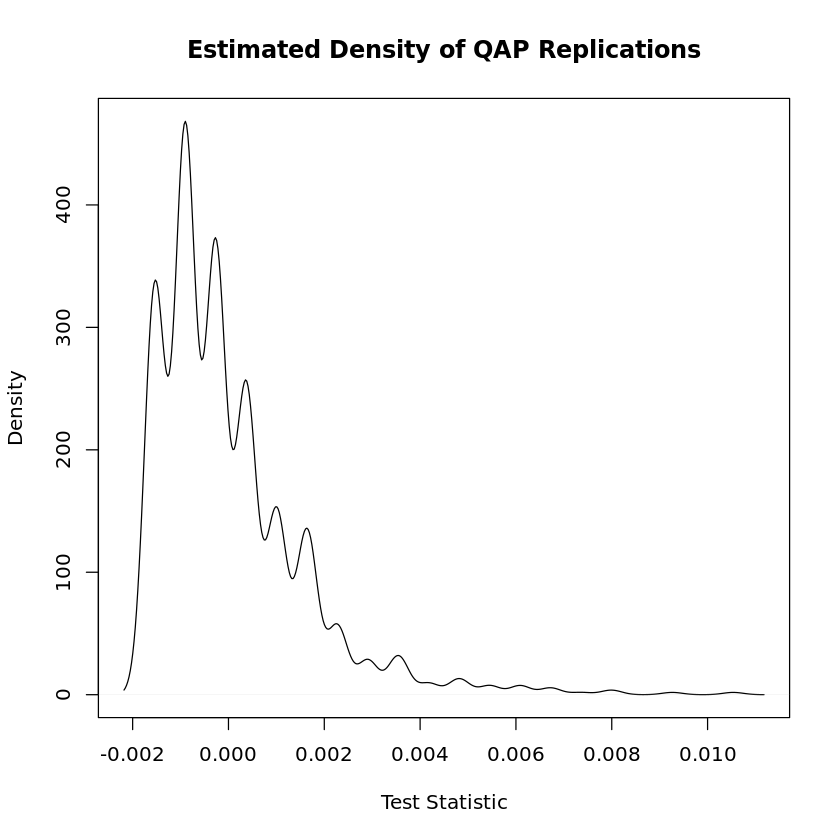

[1] 514


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 1 
	p(f(perm) <= f(d)): 0 

Test Diagnostics:
	Test Value (f(d)): 514 
	Replications: 1000 
	Distribution Summary:
		Min:	 5086 
		1stQ:	 5122 
		Med:	 5126 
		Mean:	 5125.564 
		3rdQ:	 5130 
		Max:	 5134 


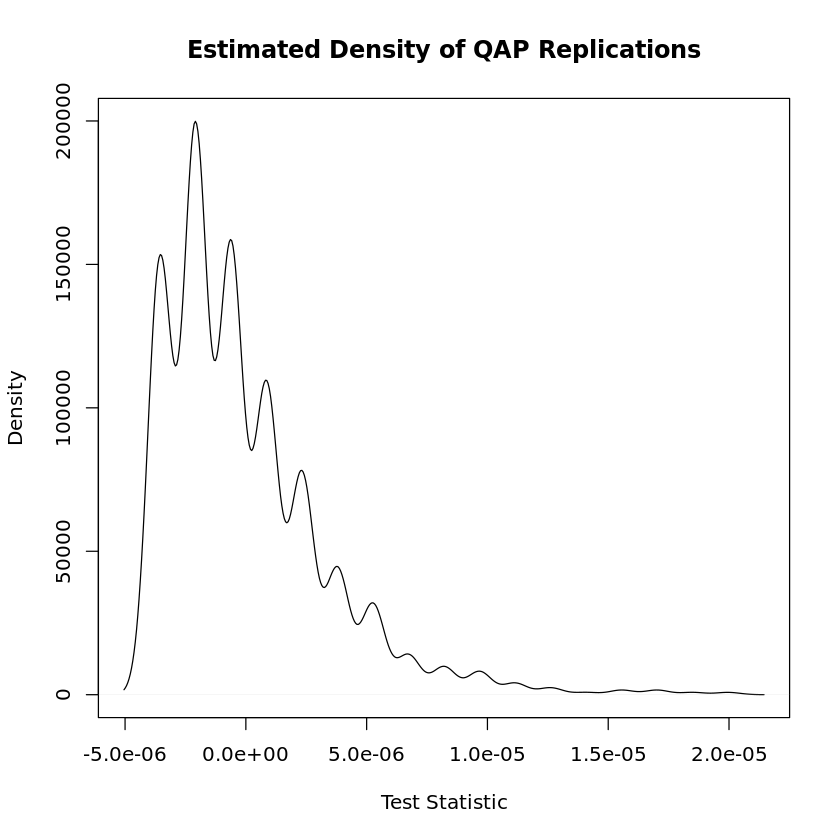

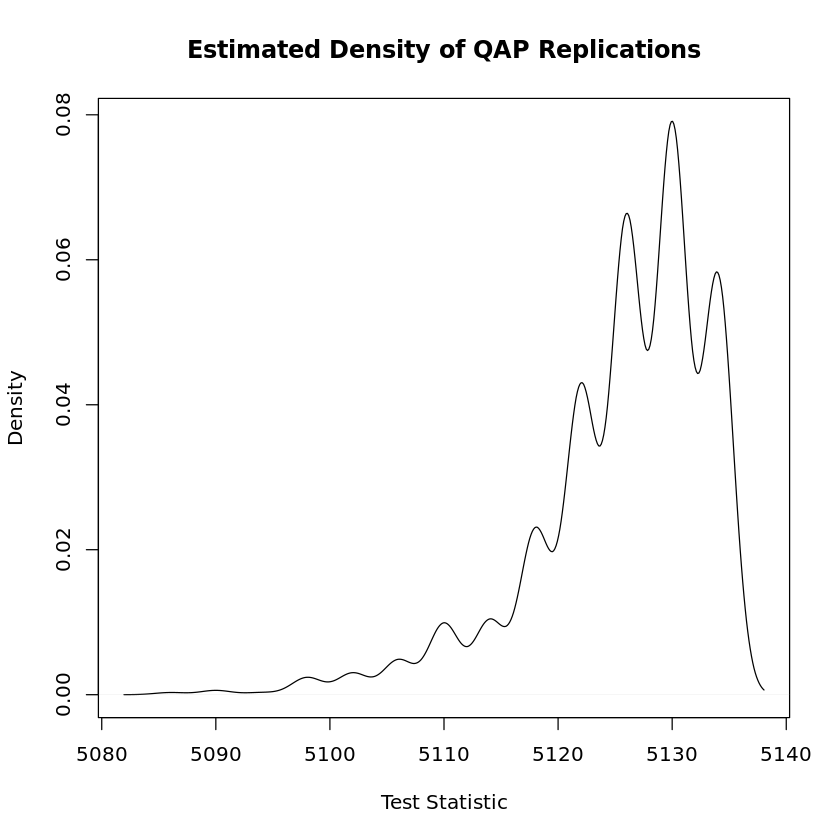

In [32]:
# link to good doc on qaptest(){sna} function: http://www.inside-r.org/packages/cran/sna/docs/qaptest

# First, need to load data - see (or just source() ) the file "sna-load_data.r".
# source( "sna-load_data.r" )
# does the following (among other things):
# Start with loading in tab-delimited files.
#humanNetworkData <- read.delim( "human-sourcenet_data-20150504-002453.tab", header = TRUE, row.names = 1, check.names = FALSE )
#calaisNetworkData <- read.delim( "puter-sourcenet_data-20150504-002507.tab", header = TRUE, row.names = 1, check.names = FALSE )

# remove the right-most column, which contains non-tie info on nodes.
#humanNetworkTies <- humanNetworkData[ , -ncol( humanNetworkData ) ]
#gmAutomatedNetworkDF <- calaisNetworkData[ , -ncol( calaisNetworkData )]

# convert each to a matrix
#gmHumanNetworkMatrix <- as.matrix( gmHumanNetworkTies )
#gmAutomatedNetworkMatrix <- as.matrix( gmAutomatedNetworkDF )

# imports
# install.packages( "sna" )
# install.packages( "statnet" )
library( "sna" )

# package up data for calling qaptest() - first make 3-dimensional array to hold
#    our two matrices - this is known as a "graph set".
graphSetArray <- array( dim = c( 2, ncol( gmHumanNetworkMatrix ), nrow( gmHumanNetworkMatrix ) ) )

# then, place each matrix in one dimension of the array.
graphSetArray[ 1, , ] <- gmHumanNetworkMatrix
graphSetArray[ 2, , ] <- gmAutomatedNetworkMatrix

# first, try a graph correlation
graphCorrelation <- sna::gcor( gmHumanNetworkMatrix, gmAutomatedNetworkMatrix )
paste( "graph correlation = ", graphCorrelation, sep = "" )

# try a qaptest...
qapGcorResult <- sna::qaptest( graphSetArray, sna::gcor, g1 = 1, g2 = 2 )
summary( qapGcorResult )
plot( qapGcorResult )

# graph covariance...
graphCovariance <- sna::gcov( gmHumanNetworkMatrix, gmAutomatedNetworkMatrix )
graphCovariance
paste( "graph covariance = ", graphCovariance, sep = "" )

# try a qaptest...
qapGcovResult <- sna::qaptest( graphSetArray, sna::gcov, g1 = 1, g2 = 2 )
summary( qapGcovResult )
plot( qapGcovResult )

# Hamming Distance
graphHammingDist <- sna::hdist( gmHumanNetworkMatrix, gmAutomatedNetworkMatrix )
paste( "graph hamming distance = ", graphHammingDist, sep = "" )

# try a qaptest...
qapHdistResult <- sna::qaptest( graphSetArray, sna::hdist, g1 = 1, g2 = 2 )
summary( qapHdistResult )
plot( qapHdistResult )

# graph structural correlation?
#graphStructCorrelation <- gscor( gmHumanNetworkMatrix, gmAutomatedNetworkMatrix )
#graphStructCorrelation


# TODO

- Back to [Table of Contents](#Table-of-Contents)

TODO:

- human data for grp_month has one fewer vertex (1167) than automated (1168).  The missing person is row 355, user ID 781 (source_3), who is in automated, not in human.  QAP needs same-size matrices.

    - 781 - Cook, Matthew ( Wayland Fire Department ) 
    - First, try to regenerate the data.
    - Then, if it doesn't get better, look into the article(s) where 781 - Cook, Matthew ( Wayland Fire Department ) is mentioned.